<a href="https://colab.research.google.com/github/aarti8822/trER/blob/main/TERM_DEPOSIT_SUBSCRIPTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

data=pd.read_csv("/content/bank-additional-full.csv", sep=";")

data.tail()
#data.shape[0]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [ ]:
#checking if there are any null values in data
data.isnull().sum()
data.replace('nonexistent', np.nan, inplace=True)
data['y'].unique()
data['poutcome'].str.contains('nonexistent').sum()
data.isna().sum()


,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


In [ ]:
#converting all columns into numeric
#y
data['y'] = data['y'].replace({'yes': 1, 'no': 0})
#housing
data_housing = pd.get_dummies(data['housing'],prefix='housing')
data_housing = data_housing.astype(int)
#loan
data_loan = pd.get_dummies(data['loan'],prefix='loan')
data_loan = data_loan.astype(int)
##job
data_job = pd.get_dummies(data['job'], prefix='job')
data_job = data_job.astype(int)
##marital
data_marital = pd.get_dummies(data['marital'],prefix='marital')
data_marital = data_marital.astype(int)
##education
data_education = pd.get_dummies(data['education'],prefix='education')
data_education = data_education.astype(int)
##contact
data_contact = pd.get_dummies(data['contact'],prefix='contact')
data_contact = data_contact.astype(int)
##day_of_week
data_day_of_week = pd.get_dummies(data['day_of_week'],prefix='day_of_week')
data_day_of_week = data_day_of_week.astype(int)
##month
data_month = pd.get_dummies(data['month'])
data_month = data_month.astype(int)
##poutcome
data_poutcome = pd.get_dummies(data['poutcome'],prefix='poutcome')
data_poutcome = data_poutcome.astype(int)
####final conversion
data_default = pd.get_dummies(data['default'],prefix='default')
data_default = data_default.astype(int)
data_new = pd.concat([data,data_housing,data_loan,data_job,data_marital,data_education,data_contact,data_day_of_week,data_month,data_default], axis=1)
data_new.drop(columns=['housing','loan','job','marital','education','contact','day_of_week','month','default','poutcome'], axis=1, inplace=True)
#data_new=data_new.astype(int)
data_new.tail()

<ipython-input-48-bf49bca2a257>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['y'] = data['y'].replace({'yes': 1, 'no': 0})


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,jul,jun,mar,may,nov,oct,sep,default_no,default_unknown,default_yes
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,0,0,1,0,0,1,0,0
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,0,0,1,0,0,1,0,0
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,0,0,1,0,0,1,0,0
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,0,0,1,0,0,1,0,0
41187,74,239,3,999,1,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,0,0,1,0,0,1,0,0


In [ ]:
data_new.isna().sum()

,0
age,0
duration,0
campaign,0
pdays,0
previous,0
...,...
oct,0
sep,0
default_no,0
default_unknown,0


# **PERFORMNG CLASSIFICATION TECHNIQUES**

**(1) LOGISTIC REGRESSION:**
**Treat y as response variable and all other as explanatory variables**

In [ ]:
y = data_new.y # Target variable
x = data_new.drop(columns=['y'])

In [ ]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
x_

In [ ]:
# import the class
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import  StandardScaler

# instantiate the model (using the default parameters)
logreg = LogisticRegression()
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# fit the model with data
logreg.fit(X_train_scaled, y_train)


LogisticRegression()

In [ ]:
np.where(y==1)[0].size

4640

In [ ]:
np.where(logreg.predict(X_test_scaled) ==1)

(array([  41,   52,   91,  106,  126,  129,  132,  145,  147,  150,  163,
         168,  183,  199,  206,  221,  225,  241,  262,  268,  277,  281,
         302,  323,  349,  371,  387,  405,  422,  425,  428,  445,  452,
         459,  461,  479,  500,  502,  505,  511,  521,  526,  529,  530,
         532,  586,  603,  605,  609,  610,  649,  659,  676,  703,  714,
         729,  746,  748,  778,  780,  823,  858,  867,  870,  906,  951,
         954,  992, 1044, 1046, 1091, 1096, 1097, 1107, 1108, 1109, 1113,
        1127, 1130, 1148, 1149, 1157, 1174, 1185, 1188, 1254, 1264, 1268,
        1270, 1338, 1341, 1353, 1355, 1389, 1393, 1402, 1407, 1408, 1409,
        1427, 1434, 1435, 1445, 1476, 1482, 1497, 1517, 1536, 1549, 1558,
        1559, 1564, 1613, 1633, 1637, 1640, 1646, 1649, 1652, 1653, 1658,
        1660, 1662, 1672, 1717, 1729, 1733, 1758, 1806, 1849, 1870, 1881,
        1891, 1911, 1917, 1933, 1938, 1950, 1974, 2017, 2023, 2035, 2037,
        2056, 2077, 2081, 2106, 2128, 

In [ ]:
#accuracy of data
logreg.score(X_test_scaled,y_test)

0.909686817188638

In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix
conf_mat=confusion_matrix(y_test,logreg.predict(X_test_scaled))
conf_mat


array([[7094,  215],
       [ 529,  400]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,logreg.predict(X_test_scaled)))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7309
           1       0.65      0.43      0.52       929

    accuracy                           0.91      8238
   macro avg       0.79      0.70      0.73      8238
weighted avg       0.90      0.91      0.90      8238



In [ ]:
from sklearn.metrics import f1_score, recall_score, accuracy_score

f1_score = f1_score(y_test, logreg.predict(X_test_scaled))
print(f1_score) #f-score

0.5181347150259067


# **(2) RANDOM FOREST**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=20)
RF.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20)

In [ ]:
RF.score(X_test, y_test)

0.9079873755765963

In [ ]:
y_predicted_RF = RF.predict(X_test)

In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm_RF = confusion_matrix(y_test, y_predicted_RF)
cm_RF

array([[7094,  215],
       [ 543,  386]])

Text(95.72222222222221, 0.5, 'Truth')

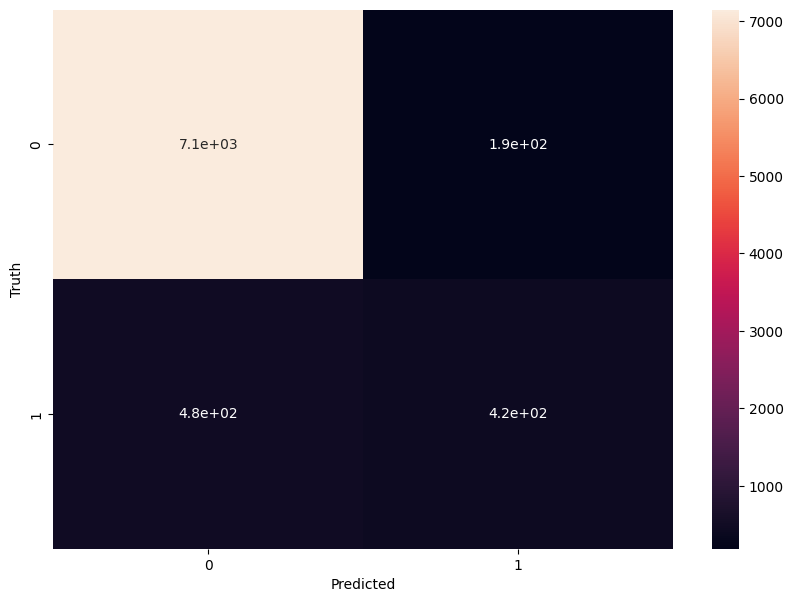

In [ ]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

**(3) ANN**

In [ ]:
import tensorflow as tf
from tensorflow import keras


ANN = keras.Sequential([
    keras.layers.Dense(26, input_shape=(60,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])



ANN.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

ANN.fit(X_train, y_train, epochs=100)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1030/1030 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8499 - loss: 6.2344
Epoch 2/100
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8776 - loss: 0.5757
Epoch 3/100
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8829 - loss: 0.4744
Epoch 4/100
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8843 - loss: 0.4929
Epoch 5/100
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8888 - loss: 0.4516
Epoch 6/100
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8874 - loss: 0.4010
Epoch 7/100
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8904 - loss: 0.3841
Epoch 8/100
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8922 - loss: 0.3249
Epoch 9/100
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8940 - loss: 0.3562
Epoch 10/100
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8887 - loss: 0.4136
Epoch 11/100
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8924 - loss: 0.3228
Epoch 12/100
1030/1030 ━━━━━━━━

In [ ]:
ANN.evaluate(X_test, y_test)

258/258 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9127 - loss: 0.1800


[0.19053515791893005, 0.9073804616928101]

In [ ]:
yp = ANN.predict(X_test)
yp

258/258 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


array([[1.13280206e-04],
       [5.82224876e-03],
       [6.31472945e-01],
       ...,
       [1.19770446e-03],
       [2.97884550e-03],
       [6.31472945e-01]], dtype=float32)